In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
import math

warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_data = pd.read_sql_query('select * from useducation', con=engine)

def data_type(data):
  for col in data.columns:
    print('The data type for the {} column is {}.'.format(col, data[col].dtypes))

fill_list = []
edu_data2 = edu_data.copy()
for col in edu_data:
  if edu_data[col].dtypes == 'float64':
    fill_list.append(col)
for col in fill_list:
  edu_data2.loc[:,col] = edu_data2.loc[:,col].fillna(edu_data2.loc[:,col].mean())






In [0]:
#Derive the descriptive statistics of the data and discuss the points you find remarkable.
for col in fill_list:
  edu_data2.loc[:,col] = edu_data2.loc[:,col].interpolate()

for col in fill_list:
  edu_data2[col] = winsorize(edu_data2[col], (0,.05))

edu_data2.describe()
print(len(fill_list))

def display_variables(data, columns):
  x = 1
  plt.figure(figsize=(25,25))
  for col in columns:
    plt.subplot(5,5,x)
    plt.hist(data[col])
    plt.title(col)
    x = x + 1
display_variables(edu_data2, fill_list)    

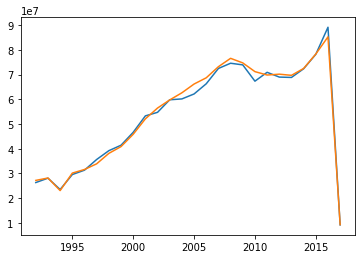

In [27]:
'''
Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. 
How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
'''
plt.plot(edu_data2.loc[edu_data2['STATE'] == 'CALIFORNIA', 'YEAR'], edu_data2.loc[edu_data2['STATE'] == 'CALIFORNIA', 'TOTAL_REVENUE'], label = 'total revenue')
plt.plot(edu_data2.loc[edu_data2['STATE'] == 'CALIFORNIA', 'YEAR'], edu_data2.loc[edu_data2['STATE'] == 'CALIFORNIA', 'TOTAL_EXPENDITURE'], label = 'total expenditure')
plt.show()

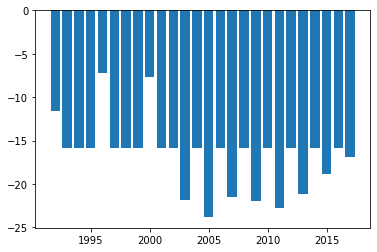

The difference in math and reading score: 
4      -11.634547
56     -15.902139
108    -15.902139
161    -15.902139
213     -7.216492
264    -15.902139
316    -15.902139
367    -15.902139
420     -7.648537
472    -15.902139
524    -15.902139
576    -21.822545
628    -15.902139
680    -23.854931
731    -15.902139
784    -21.511905
836    -15.902139
891    -21.912522
944    -15.902139
997    -22.806357
1048   -15.902139
1101   -21.108497
1152   -15.902139
1203   -18.871396
1254   -15.902139
1451   -16.841127
dtype: float64


In [32]:
'''
In your chosen state, which of the lessons are the students more successful, math or reading?
'''

plt.bar(edu_data2.loc[edu_data2.STATE == 'CALIFORNIA', 'YEAR'], edu_data2.loc[edu_data2.STATE == 'CALIFORNIA', 'AVG_READING_4_SCORE'] -
        edu_data2.loc[edu_data2.STATE == 'CALIFORNIA', 'AVG_MATH_4_SCORE'])
plt.show()

print('The difference in math and reading score: ')
print(edu_data2.loc[edu_data2.STATE == 'CALIFORNIA', 'AVG_READING_4_SCORE'] - edu_data2.loc[edu_data2.STATE == 'CALIFORNIA', 'AVG_MATH_4_SCORE'])

(array([   3.,    0.,    3.,   15.,   35.,   48.,   94., 1100.,  163.,
          31.]), array([187.13466996, 193.76329908, 200.39192819, 207.02055731,
        213.64918643, 220.27781555, 226.90644466, 233.53507378,
        240.1637029 , 246.79233202, 253.42096113]), <a list of 10 Patch objects>)

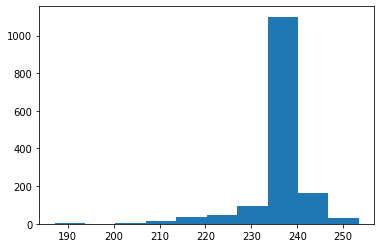

In [37]:
'''
What are the distributions of the math and reading scores in the sample?
'''

plt.hist(edu_data2['AVG_MATH_4_SCORE'])